In [22]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle

In [23]:
#Load data
df = pd.read_csv('data/TSLA.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [25]:
# Number of trading days
df.shape

(2416, 7)

In [26]:
# Convert Date column from object to datetime 
df['Date'] = pd.to_datetime(df['Date'])

# Extracting year,month and day to new column,follow the code:

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [27]:
# Drop unwanted features
df.drop(['High','Low','Date'],axis=1, inplace=True)

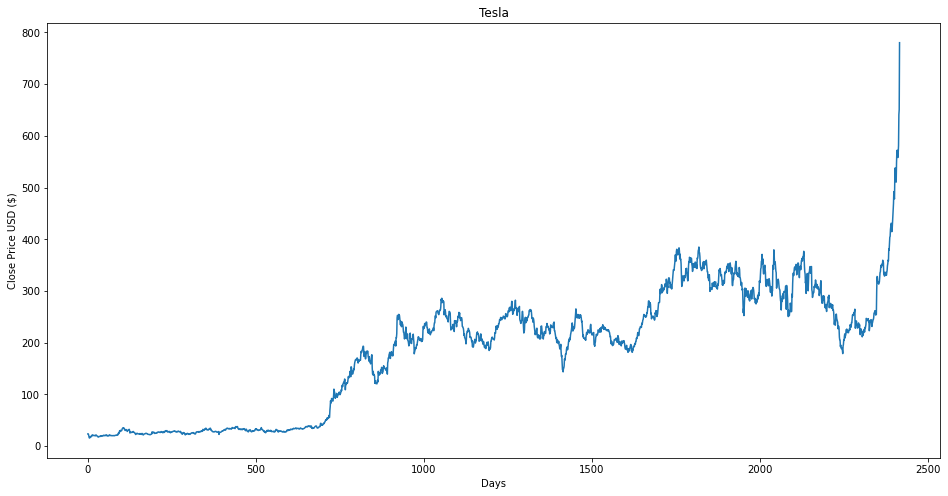

In [28]:
# Visualize close price data
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [29]:
#Get only close price
df = df[['Close']]
df.head(4)

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001


In [30]:
#create variable to predict x number of days out into the future
future_days = 31
#create a new column shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
2412,580.989990,NaN
2413,640.809998,NaN
2414,650.570007,NaN
2415,780.000000,NaN


In [31]:
df

,Close,Prediction
0,23.889999,17.600000
1,23.830000,18.320000
2,21.959999,18.780001
3,19.200001,19.150000
4,16.110001,18.770000
...,...,...
2411,566.900024,NaN
2412,580.989990,NaN
2413,640.809998,NaN
2414,650.570007,NaN


In [44]:
#create the feature dataset (x) and convert it to numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
X.shape

(2385, 1)

In [45]:
#create target dataset (y) and convert it to numpy array 
#get all target values except the last 'x' rows/days 
y = np.array(df['Prediction'])[:-future_days]
y.shape

(2385,)

In [46]:
#split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [47]:
#Create decisionTree model
dt = DecisionTreeRegressor().fit(X_train, y_train)

In [48]:
# save model
filename_dt = 'dt_stock_model.sav'
pickle.dump(dt, open(filename_dt, 'wb'))

In [49]:
#Create linear regression model
lr = LinearRegression().fit(X_train, y_train)

In [50]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [51]:
#show model prediction for decisionTree
tree_prediction = dt.predict(x_future)
print(tree_prediction)

[393.149994  334.285004  405.589996  419.220001  425.25      430.940002
 393.3950045 414.700012  418.329987  430.26001   328.200012  317.4649965
 469.059998  492.140015  481.339996  346.170013  524.859985  537.919983
 518.5       376.790009  510.5       547.200012  569.559998  572.200012
 564.820007  558.02002   566.900024  580.98999   640.809998  650.570007
 780.       ]


In [52]:
#show model prediction for linear regression
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[324.43360203 324.18435947 333.51598722 342.44886275 344.04402116
 351.96991584 356.79524895 352.98681455 356.21701915 359.02848229
 356.85506417 366.35618983 359.07831884 361.68039728 339.95643708
 343.246426   335.84892356 338.21173911 336.86582227 341.78087871
 343.10686612 339.94645741 337.29451251 342.79780832 346.42676415
 355.70855435 359.55687553 366.51570906 365.22963935 388.26960728
 385.76720194]


<ipython-input-53-57de4b12a4fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = tree_prediction


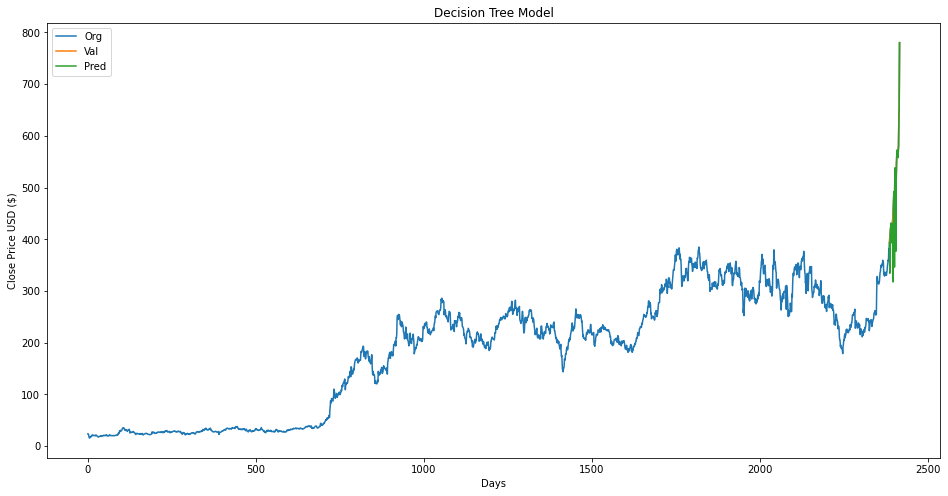

In [53]:
#Visualize Predicted data
valid = df[X.shape[0]:]
valid['Prediction'] = tree_prediction
plt.figure(figsize=(16,8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Org','Val','Pred'])
plt.show()

<ipython-input-54-1dcbe4e76abe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = lr_prediction


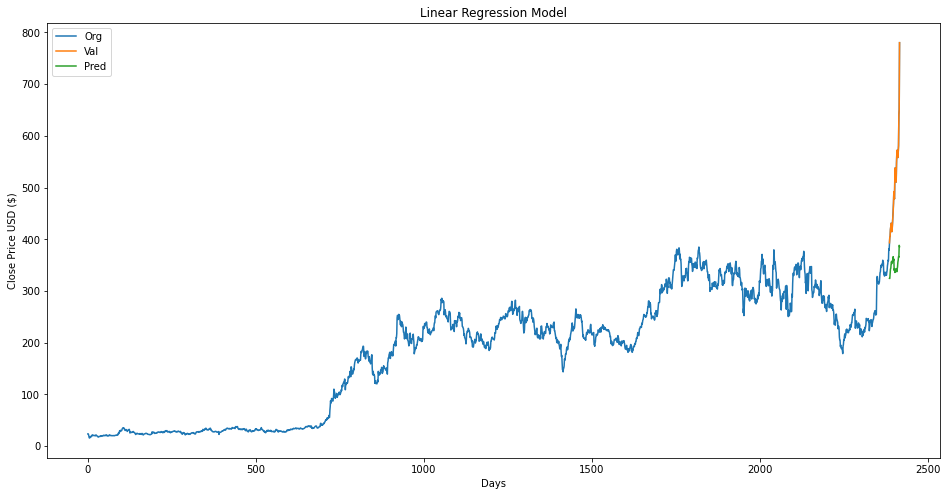

In [54]:
#Visualize Predicted data
valid = df[X.shape[0]:]
valid['Prediction'] = lr_prediction
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Org','Val','Pred'])
plt.show()

In [55]:
# load the model from disk
loaded_model_dt = pickle.load(open(filename_dt, 'rb'))
result = loaded_model_dt.score(X_test, y_test)
print(result)

0.8692412210560574
